# Juanalytics: Analyzing my own LinkedIn Posts
<p>By <a href="https://www.linkedin.com/in/jmperafan/">Juan Manuel Perafan</a></p>
<p>Back in October of 2018, I started posting data science and business intelligence tips on LinkedIn using the hashtag <a href="https://www.linkedin.com/feed/hashtag/juanalytics/">#juanalytics</a>. In a world saturated by content for beginners, my idea was to centralize content for mediors and advanced users of data tools like R, Python, SQL, Tableau, Alteryx, Excel. </p>

<p><img src="https://miro.medium.com/max/1400/0*8gb5Ir-2ROQne0WN" alt=""></p>

## 1. Import and explore data

In [15]:
# install.packages("tidyverse", repos = "https://lib.ugent.be/CRAN/")
# install.packages("tidytext", repos = "https://lib.ugent.be/CRAN/")

# Load datasets
library("tidyverse")
library("tidytext")

# Load data
posts_raw <- read_csv('datasets/juanalytics_posts.csv')

# Take a look at some of the observations
glimpse(posts)

Parsed with column specification:
cols(
  Id = col_integer(),
  Months = col_integer(),
  Likes = col_integer(),
  Comments = col_integer(),
  Post = col_character(),
  Url = col_character(),
  Media = col_character(),
  Original = col_logical(),
  Type = col_character(),
  Mention = col_character(),
  Effort = col_logical()
)


Observations: 152
Variables: 12
$ Id       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,...
$ Months   <int> 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, ...
$ Likes    <int> 5, 12, 18, 17, 14, 4, 12, 45, 20, 57, 13, 88, 1, 36, 10, 2...
$ Comments <int> 1, 3, 0, 0, 1, 0, 0, 5, 4, 17, 6, 9, 0, 4, 0, 3, 5, 6, 1, ...
$ Post     <chr> "Which products are often purchased together? That's a que...
$ Url      <chr> "https://www.linkedin.com/posts/jmperafan_tableau-marketba...
$ Media    <chr> "Image", "Image", "Image", "Image", "Image", "Image", "Ima...
$ Original <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRU...
$ Type     <fct> Display, Accomplishment, Joke, Display, Display, Display, ...
$ Mention  <chr> NA, NA, "Marketoonist", NA, NA, NA, NA, NA, NA, NA, NA, "S...
$ Effort   <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE...
$ Links    <int> 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 2...


## 2. Clean the data

In [7]:
# To clean and enrich the data, we need to create multiple columns.
posts <- posts_raw %>%
  mutate(
    # 1. Transform Effort into a boolean.
    Effort = ifelse(is.na(Effort), TRUE, FALSE)

    # 2. Transform Type into a factor
    , Type = as.factor(Type)
    
    # 3. Count the amount of links per post
    , Links = str_count(Post, pattern = "http")
)

# This is how the dataset looks after modifying these 3 columns
glimpse(posts)

Observations: 152
Variables: 12
$ Id       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,...
$ Months   <int> 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, ...
$ Likes    <int> 5, 12, 18, 17, 14, 4, 12, 45, 20, 57, 13, 88, 1, 36, 10, 2...
$ Comments <int> 1, 3, 0, 0, 1, 0, 0, 5, 4, 17, 6, 9, 0, 4, 0, 3, 5, 6, 1, ...
$ Post     <chr> "Which products are often purchased together? That's a que...
$ Url      <chr> "https://www.linkedin.com/posts/jmperafan_tableau-marketba...
$ Media    <chr> "Image", "Image", "Image", "Image", "Image", "Image", "Ima...
$ Original <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRU...
$ Type     <fct> Display, Accomplishment, Joke, Display, Display, Display, ...
$ Mention  <chr> NA, NA, "Marketoonist", NA, NA, NA, NA, NA, NA, NA, NA, "S...
$ Effort   <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE...
$ Links    <int> 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 2...


## 3. Create a custom Stop Words dictionary

In [9]:
# Create a custom dictionary of stop_words.
custom_stop_words <- stop_words %>%
  
  # In the original stop_words dictionary, R is included as a stopword
  filter(!str_detect(word, '^r*$')) %>% 
  
  # Adding a dataframe with a custom lexicon of stop_words
  bind_rows(
    tibble(word = c("hashtag", "juanalytics", "https", "lnkd.in"),
               lexicon = "custom")
)

## 4. Tokenizing the text

In [11]:
bag_of_words <- posts %>%

  # This is the function to tokenize my posts
  unnest_tokens(word, Post) %>%

  # This sentence removes the stop words
  anti_join(custom_stop_words) %>%

  # Some lines are just numbers... They don't add much value
  slice(which(!str_detect(word, '^[0-9]*$'))) %>%

  # Now I take the count to see which words appear more often
  count(word, sort = TRUE) %>%

  # Most of the words are said once, so I will limit myself to words mention more than 15 times
  filter(n > 15) %>%
 
  # This step is needed to order words from the most frequent in descent order
  mutate(word = reorder(word, n)) 

# This is how the dataset looks like now
# These here are my top 5 words
head(bag_of_words)

Joining, by = "word"


word,n
tableau,199
data,124
check,49
link,44
r,43
time,32


## 5. Most used words

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

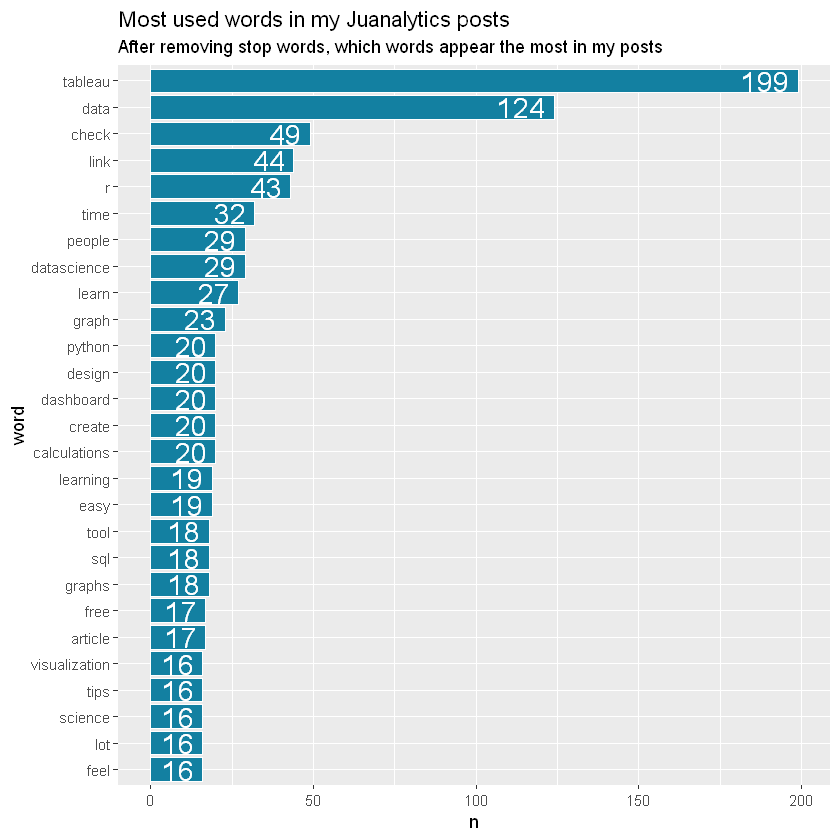

In [12]:
bag_of_words %>%
  ggplot(aes(word, n)) +
  geom_col(colour = "white", fill = "#1380A1") +
  geom_label(aes(x = word, y = n, label = round(n, 0)),
             hjust = 1, 
             vjust = 0.5, 
             colour = "white", 
             fill = NA, 
             label.size = NA, 
             family="Helvetica", 
             size = 6) +
  coord_flip() +
  labs(
    title="Most used words in my Juanalytics posts"
    , subtitle = "After removing stop words, which words appear the most in my posts"
    )

## 6. Which tools I mention the most?

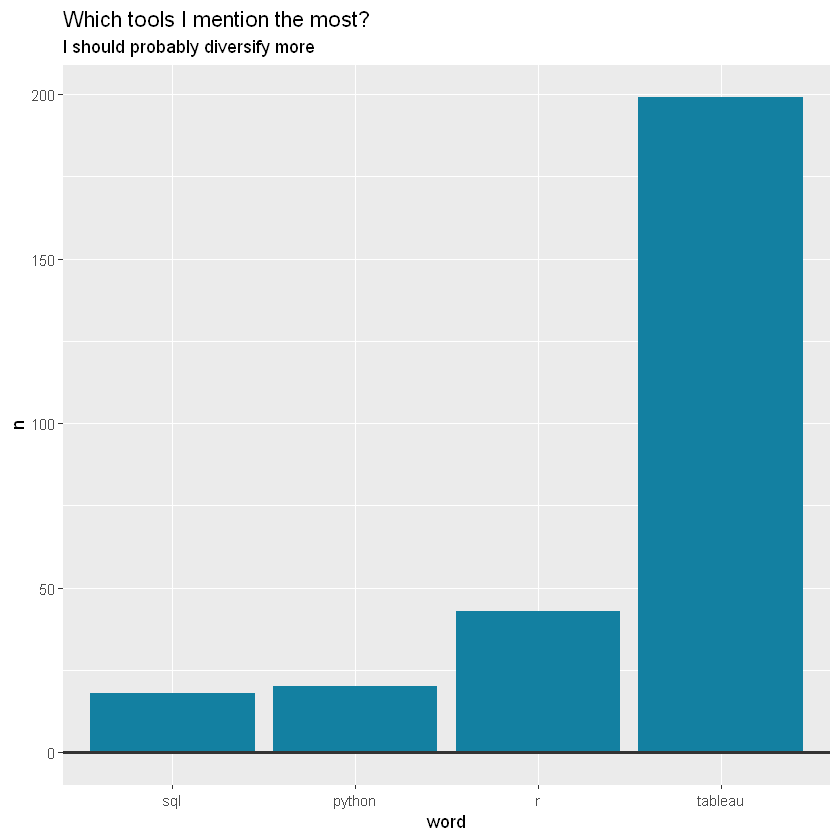

In [13]:
bag_of_words %>%
  filter(word %in% c('tableau', 'r', 'python', 'sql', 'excel', 'alteryx')) %>% 
  ggplot(aes(x = word, y = n)) +
  geom_bar(stat="identity"
           , position="identity"
           , fill="#1380A1") +
  geom_hline(yintercept = 0, size = 1, colour="#333333") +
  labs(title="Which tools I mention the most?",
       subtitle = "I should probably diversify more")